In [87]:
import pandas as pd


In [88]:
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns
import numpy as np
dataset = pd.read_csv('./diabetes.csv')
dataset.corr() # afficher les correlations



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [90]:
dataset.isnull().sum() # afficher les valeur null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
dataset.columns #afficher les colonnes pour verifier les noms claires des colonnes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
x= dataset.iloc[:,:-1] #colonne features
y=dataset.iloc[:,-1] #lignes
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [93]:
print ('pourcentage de 1: {0:.3f}'.format(y.mean()))
print ('pourcentage de 0: {0:.3f}'.format(1-y.mean()))

pourcentage de 1: 0.349
pourcentage de 0: 0.651


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       146
           1       0.62      0.62      0.62        85

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [97]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)

In [98]:
clf.score(x_test,y_test)

0.7705627705627706

In [99]:
print (classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



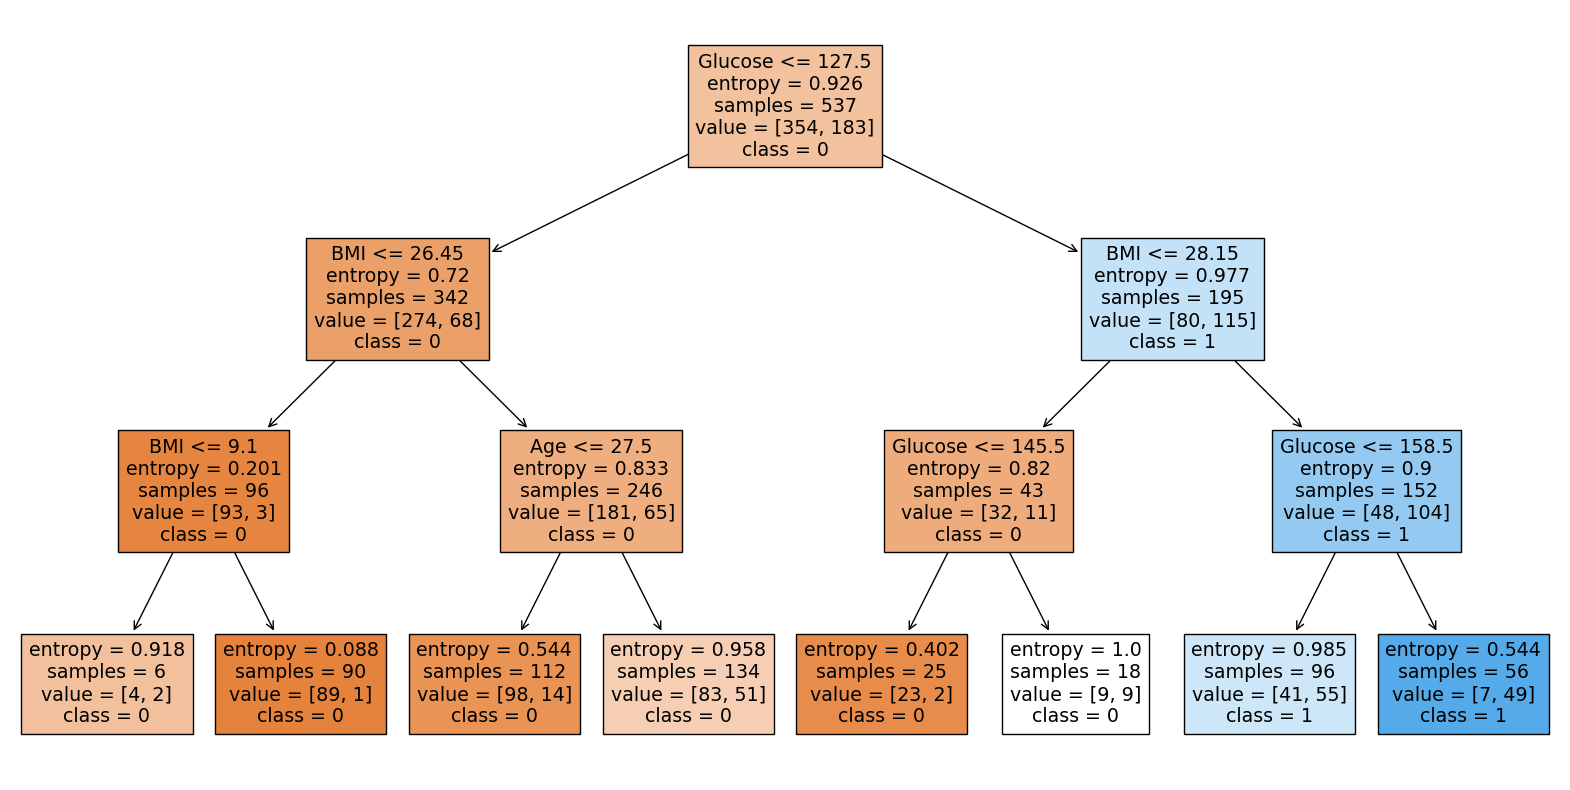

In [100]:
from sklearn import tree
fig = plt.figure(figsize=(20,10))
_=tree.plot_tree(clf,feature_names=x.columns, class_names=['0','1'], filled=True)


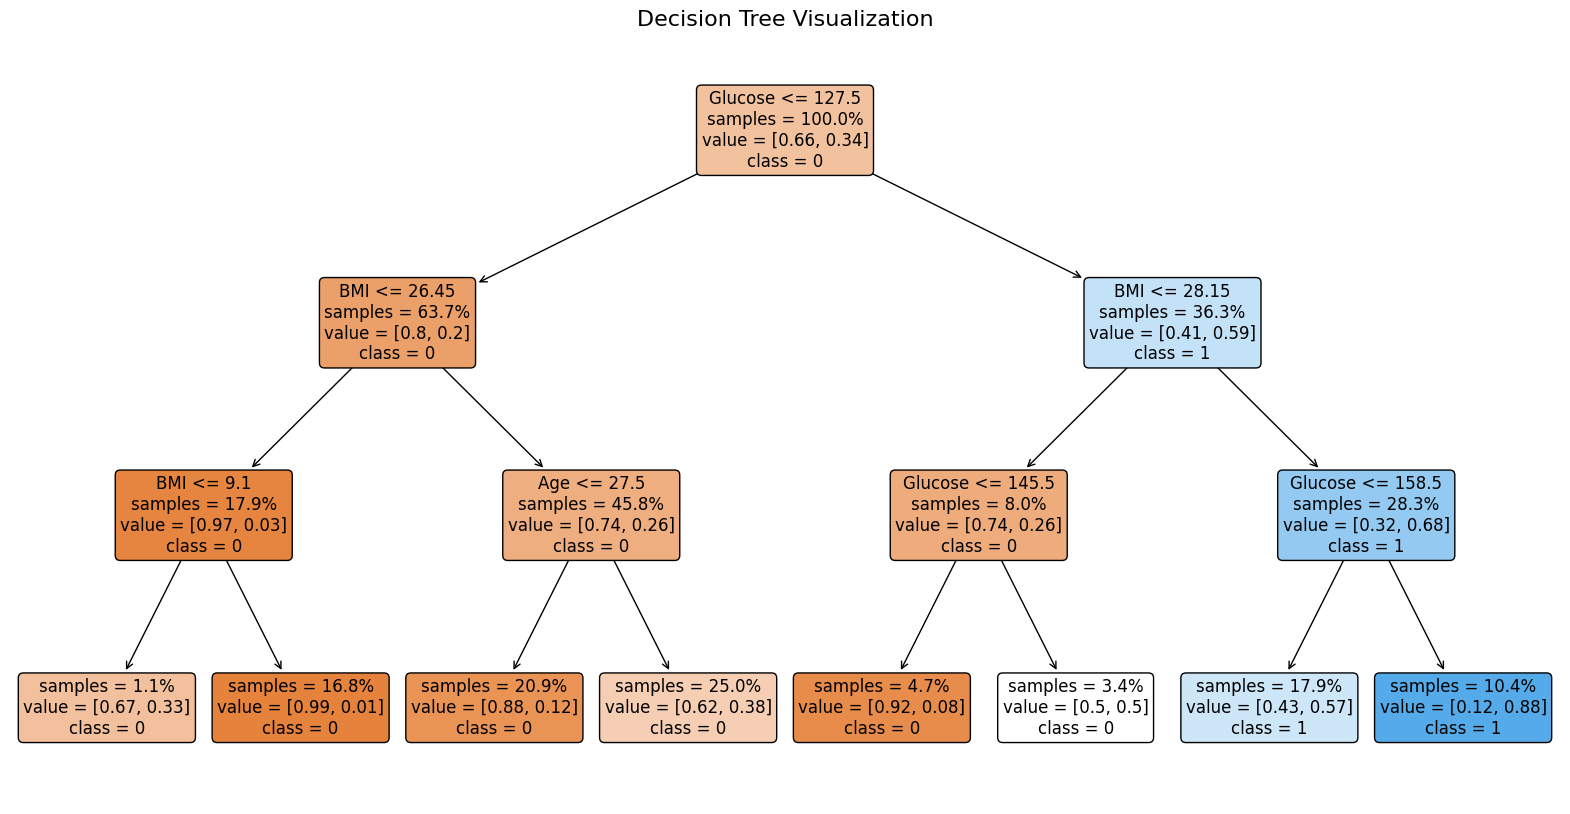

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20, 10))

_ = tree.plot_tree(clf, 
                   feature_names=x.columns, 
                   class_names=['0', '1'], 
                   filled=True, 
                   rounded=True, 
                   proportion=True, 
                   fontsize=12, 
                   precision=2, 
                   impurity=False)

plt.title("Decision Tree Visualization", fontsize=16)

# Display the plot
plt.show()

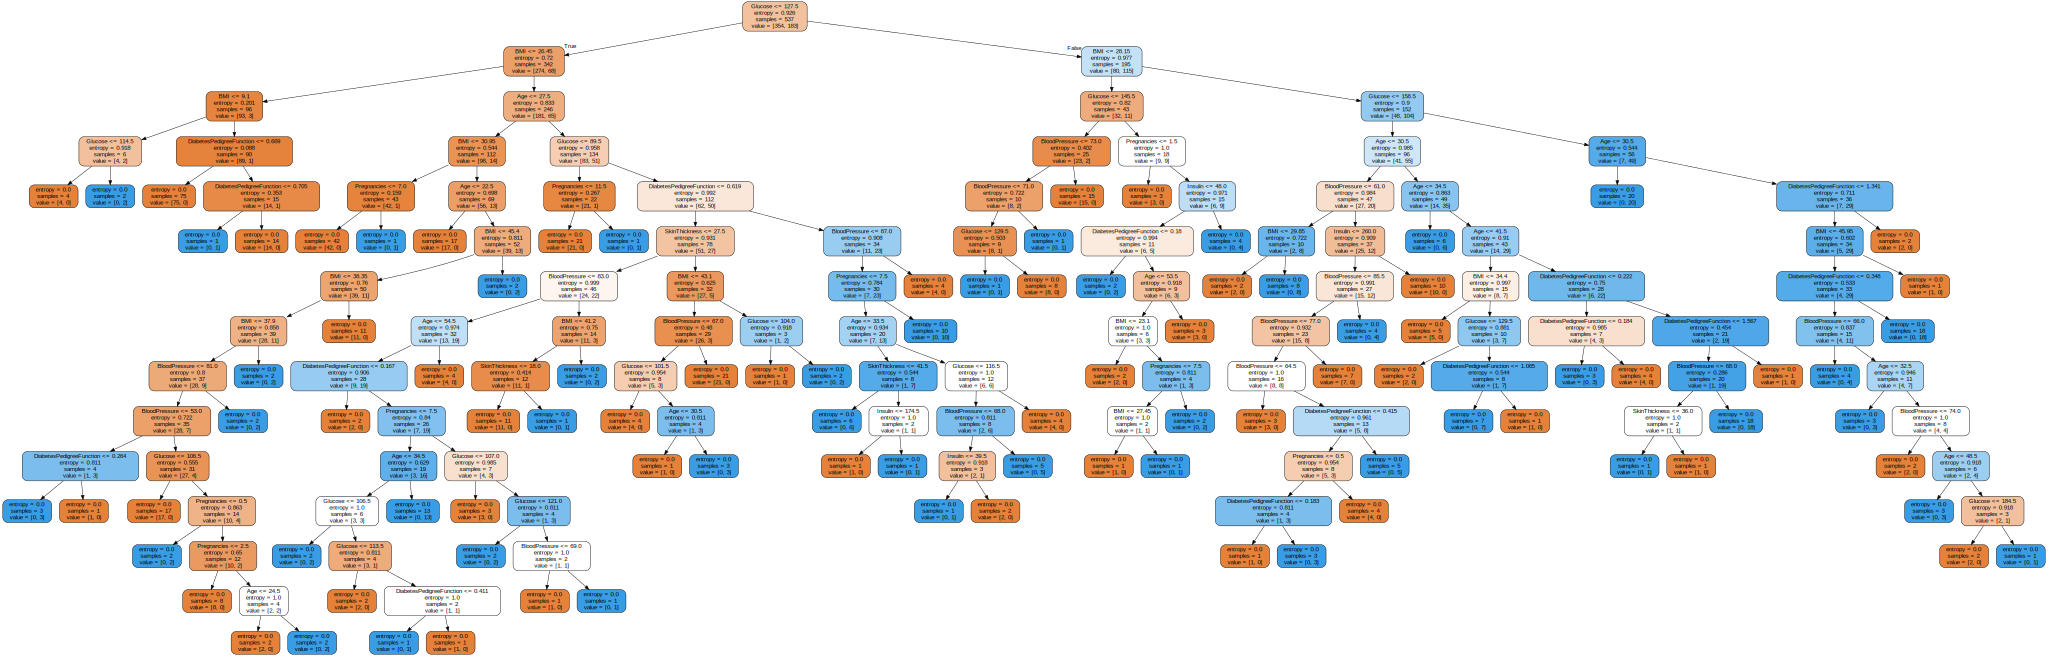

In [102]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz  # Required to render the `.dot` file

export_graphviz(
    dt,  
    feature_names=x.columns,  
    out_file="tree.dot", 
    filled=True, 
    rounded=True
)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 


In [103]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.831122 to fit


0

In [104]:
from sklearn.model_selection import cross_val_score
clf_cv = DecisionTreeClassifier(criterion="entropy",max_depth=3)
cv_scores = cross_val_score(clf_cv,x_train,y_train,cv=5)

print(cv_scores)


[0.68518519 0.76851852 0.71962617 0.73831776 0.71962617]


In [105]:

np.mean(cv_scores)

0.7262547594323294

In [106]:
from sklearn.model_selection import GridSearchCV
pgrid = { "max_depth":[i for i in  range(1,8)],
         "min_samples_split":[2,3,5,10,15,20] }

In [107]:
grid_search  = GridSearchCV(DecisionTreeClassifier(criterion="entropy"),param_grid=pgrid,cv=5)

In [108]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 10, 15, 20]})

In [109]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 15}

In [110]:
dt2 = DecisionTreeClassifier(criterion="entropy" , max_depth=7,min_samples_split=15)
dt2 = dt2.fit(x_train,y_train)
y_pred_dt2 = dt2.predict(x_test) 
dt2.score(x_train,y_train)

0.8715083798882681

In [111]:
print(classification_report(y_test,y_pred_dt2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       146
           1       0.69      0.73      0.71        85

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.78      0.78      0.78       231

